In [46]:
import os
import cv2
import random
import pickle
from tqdm import tqdm
import numpy as np
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten, BatchNormalization,Dropout
from keras import callbacks

In [47]:
DATA_DIR = r"C:\Users\abdul\Downloads\Face Mask Dataset\Face Mask Dataset"
TRAIN_DATA_DIR = os.path.join(DATA_DIR, 'Train')
VALID_DATA_DIR = os.path.join(DATA_DIR, 'Valid')

In [48]:
IMG_SIZE = 227
CATEGORIES = []
for i in os.listdir(TRAIN_DATA_DIR):
    CATEGORIES.append(i)

['incorrectMask', 'WithMask', 'WithoutMask']


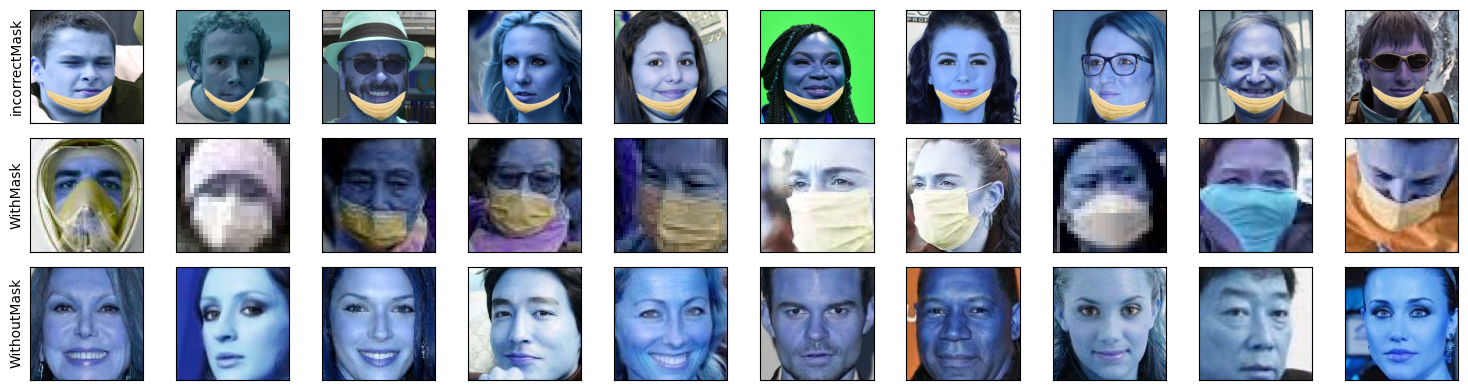

In [49]:
print(CATEGORIES)
plt.figure(figsize=(15,4))
i=0
for c in CATEGORIES:  
    path = os.path.join(TRAIN_DATA_DIR,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.subplot(3,10,i+1)
        plt.imshow(img_array)
        if i%10 == 0:
            plt.ylabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i%10 == 0:
            break

plt.tight_layout()        
plt.show() 
training_data = []

In [50]:
for c in CATEGORIES:
    path = os.path.join(TRAIN_DATA_DIR, c) # 'E:/DATASETS/classification/Face Mask Dataset/train/WithMask'
    class_num = CATEGORIES.index(c) # 0
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   # read the image
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize the image
            training_data.append([img_resized, class_num]) # [ [img, 0], [], [], [], ...., []]
        except Exception as e:
            pass

100%|██████████| 5000/5000 [00:02<00:00, 1937.55it/s]


In [51]:
print(len(training_data))
valid_data = []

12500


In [52]:
for c in CATEGORIES:
    path = os.path.join(VALID_DATA_DIR, c) 
    class_num = CATEGORIES.index(c) 
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
            valid_data.append([img_resized, class_num])
        except Exception as e:
            pass
        
print(len(valid_data))

100%|██████████| 400/400 [00:00<00:00, 1154.38it/s]

1200


In [53]:
# Separate images and labels for training data
X_train = []
y_train = []

for features, label in training_data:
    X_train.append(features)
    y_train.append(label)

X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_train = np.array(y_train)

# Separate images and labels for validation data
X_valid = []
y_valid = []

for features, label in valid_data:
    X_valid.append(features)
    y_valid.append(label)

X_valid = np.array(X_valid).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_valid = np.array(y_valid)

In [54]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Add dropout for regularization
model.add(layers.Dense(len(CATEGORIES), activation='softmax'))


RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [56]:
from keras.callbacks import LearningRateScheduler

def schedule(epoch, lr):
    if epoch < 5:
        return 0.001
    else:
        return 0.001 * np.exp(0.1 * (5 - epoch))

lr_scheduler = LearningRateScheduler(schedule)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[lr_scheduler])


Epoch 1/10
391/391 [==============================] - 272s 694ms/step - loss: 2.7731 - accuracy: 0.8966 - val_loss: 0.6888 - val_accuracy: 0.7892 - lr: 0.0010
Epoch 2/10
391/391 [==============================] - 272s 697ms/step - loss: 0.1672 - accuracy: 0.9534 - val_loss: 0.3713 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 3/10
391/391 [==============================] - 271s 693ms/step - loss: 0.1255 - accuracy: 0.9626 - val_loss: 0.6500 - val_accuracy: 0.8042 - lr: 0.0010
Epoch 4/10
391/391 [==============================] - 271s 692ms/step - loss: 0.1076 - accuracy: 0.9698 - val_loss: 1.6180 - val_accuracy: 0.7283 - lr: 0.0010
Epoch 5/10
391/391 [==============================] - 270s 690ms/step - loss: 0.1439 - accuracy: 0.9603 - val_loss: 0.8905 - val_accuracy: 0.8250 - lr: 0.0010
Epoch 6/10
391/391 [==============================] - 271s 694ms/step - loss: 0.1379 - accuracy: 0.9590 - val_loss: 0.5201 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 7/10
391/391 [==========================

In [ ]:
model.save('mask_detection_model.h5')